In [1]:
import pandas as pd

In [1]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
import numpy as np
import pandas as pd

hsedata = pd.read_csv('train.csv')

In [8]:
hsedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
HouseNumData = pd.DataFrame(hsedata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [19]:
print(houseNumData)

      LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
0        8450       1710          856         548     208500
1        9600       1262         1262         460     181500
2       11250       1786          920         608     223500
3        9550       1717          756         642     140000
4       14260       2198         1145         836     250000
...       ...        ...          ...         ...        ...
1455     7917       1647          953         460     175000
1456    13175       2073         1542         500     210000
1457     9042       2340         1152         252     266500
1458     9717       1078         1078         240     142125
1459     9937       1256         1256         276     147500

[1460 rows x 5 columns]


In [20]:
HouseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


In [21]:
##attribute

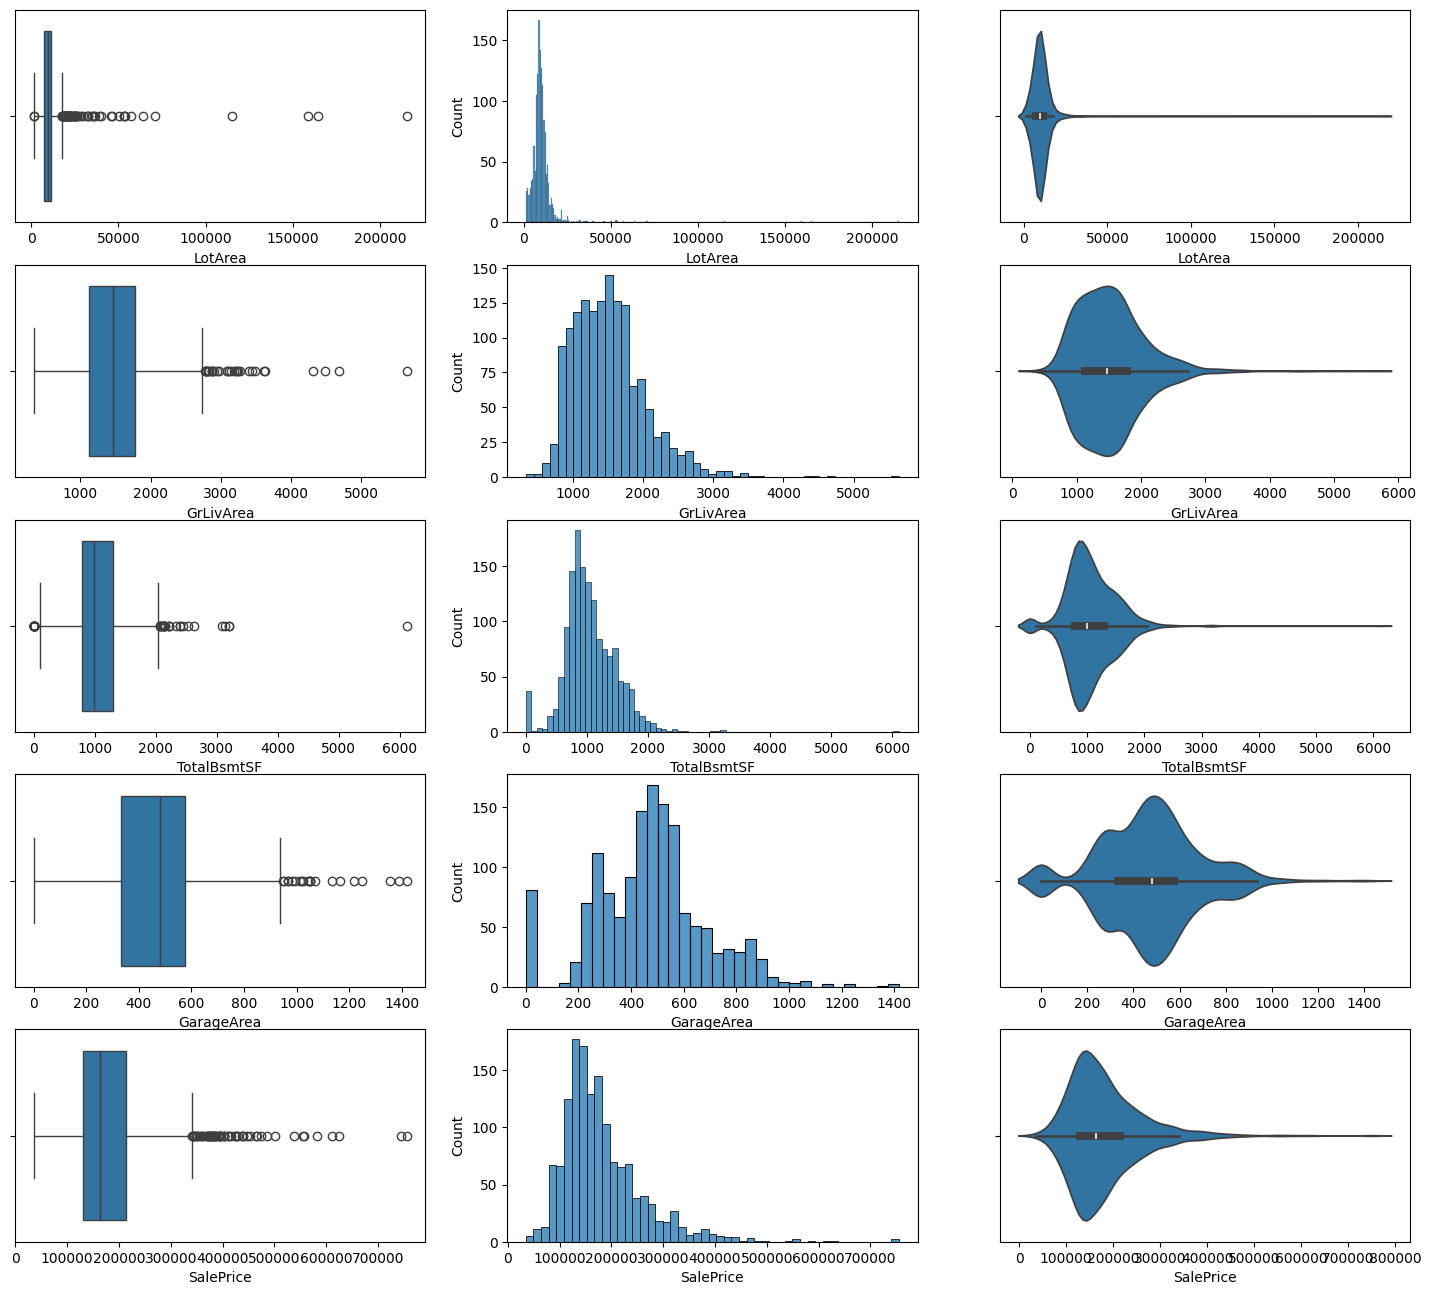

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb
f, axes = plt.subplots(5, 3, figsize=(18, 16))
count = 0
for var in HouseNumData:
    sb.boxplot(data=HouseNumData[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data=HouseNumData[var], ax = axes[count, 1])
    sb.violinplot(data=HouseNumData[var], orient = "h", ax = axes[count, 2])
    count += 1

In [29]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<Axes: >

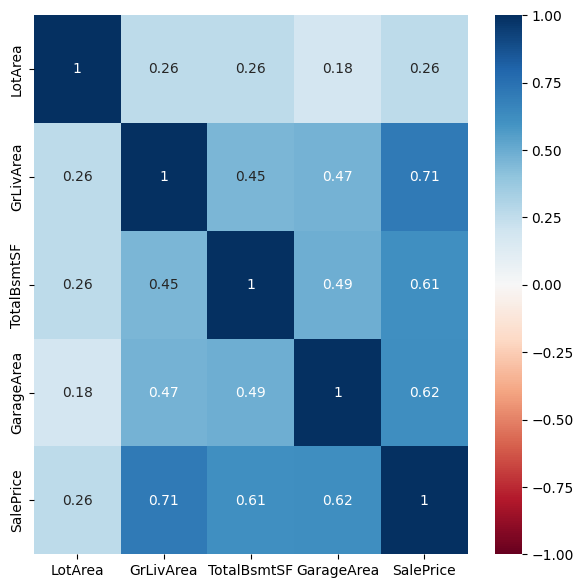

In [38]:
plt.figure(figsize=(7, 7))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1,annot = True, cmap = 'RdBu')

In [31]:
# from the heat map above, we can conclude that GrLivArea has the greatest correlation with Saleprice

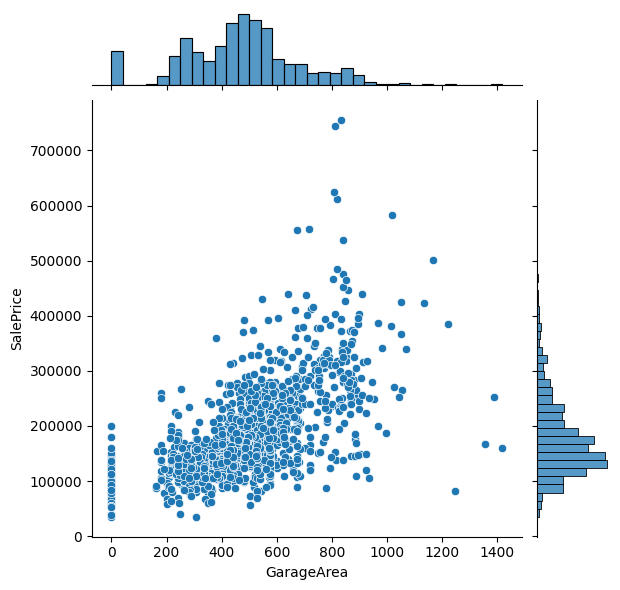

In [39]:
sb.jointplot(data = houseNumData, x = 'GarageArea', y = 'SalePrice')

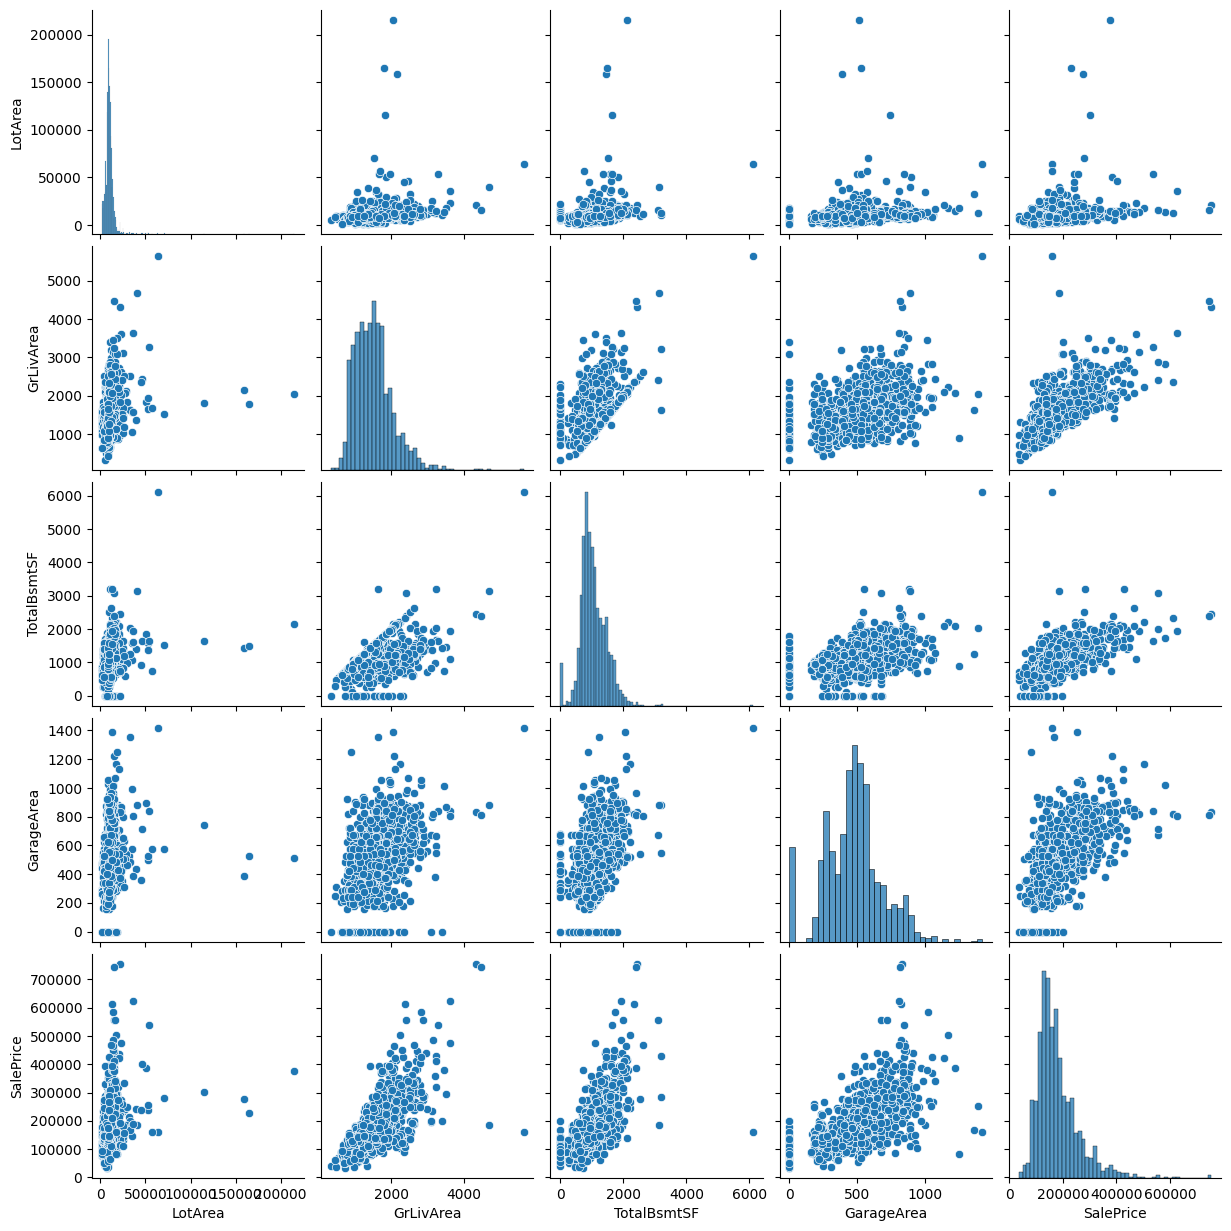

In [40]:
sb.pairplot(data = houseNumData)  #understand relationship between pair variables

In [41]:
print("Data Type:" , type(HouseNumData))

Data Type: <class 'pandas.core.frame.DataFrame'>


In [43]:
houseCatData = pd.DataFrame(hsedata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [44]:
#Statitical Summary

In [45]:
#First convert each column into category data type

In [46]:
# Convert each column to the "category" data type
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')

In [56]:
print(houseCatData['MSSubClass'].dtype)
print(houseCatData['Neighborhood'])

category
0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: category
Categories (25, object): ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', ..., 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [51]:
#Visualize Distribution

        MSSubClass Neighborhood BldgType  OverallQual
count         1460         1460     1460         1460
unique          15           25        5           10
top             20        NAmes     1Fam            5
freq           536          225     1220          397


Text(0.5, 1.0, 'Distribution of BldgType')

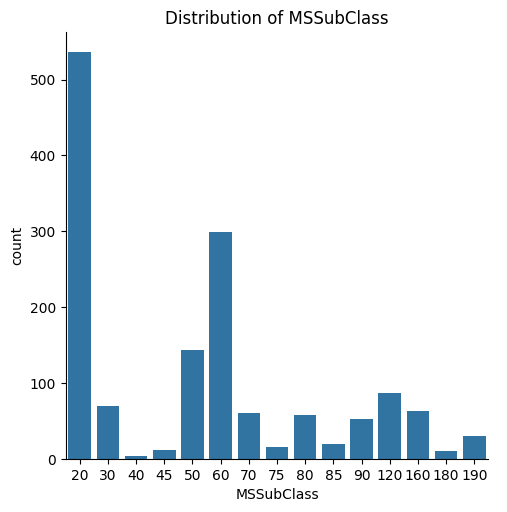

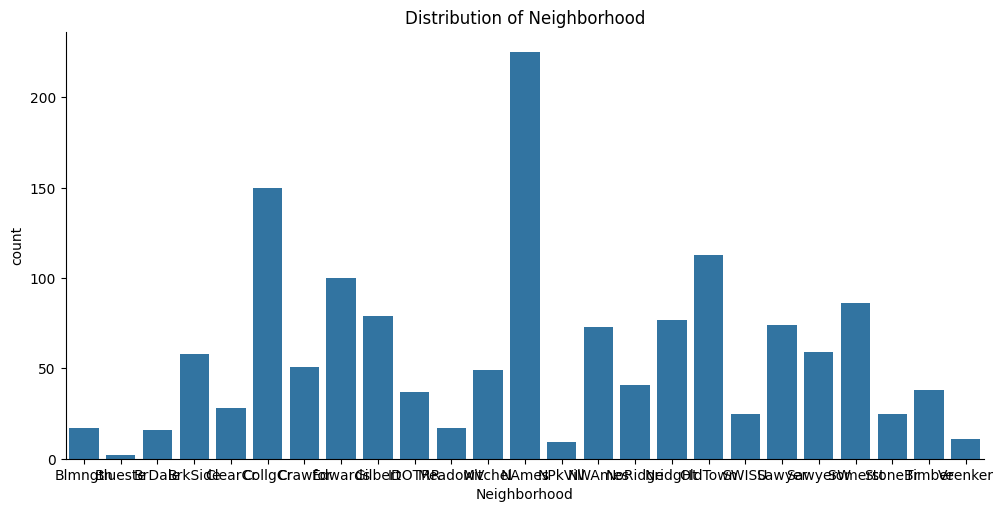

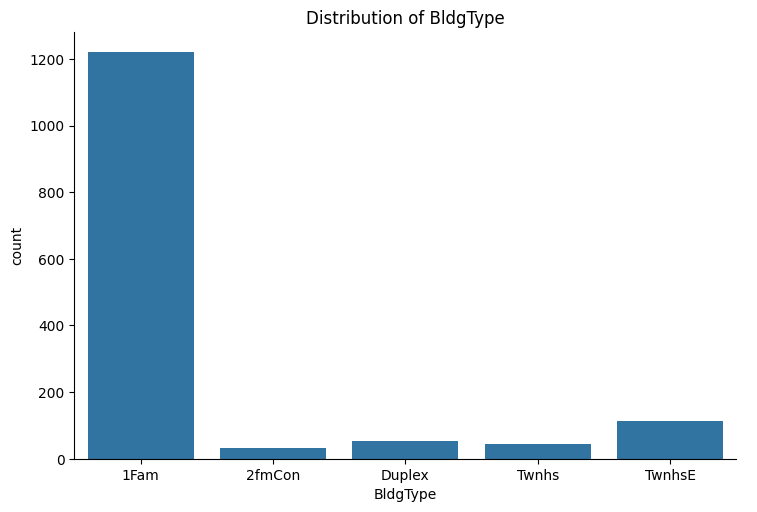

In [59]:
print(houseCatData.describe())

sb.catplot(x='MSSubClass', data=houseCatData, kind='count')
plt.title('Distribution of MSSubClass')


sb.catplot(x='Neighborhood', data=houseCatData, kind='count', height=5, aspect=2)
plt.title('Distribution of Neighborhood')


sb.catplot(x='BldgType', data=houseCatData, kind='count', height=5, aspect=1.5)
plt.title('Distribution of BldgType')

Text(0.5, 1.0, 'Distribution of OverallQual')

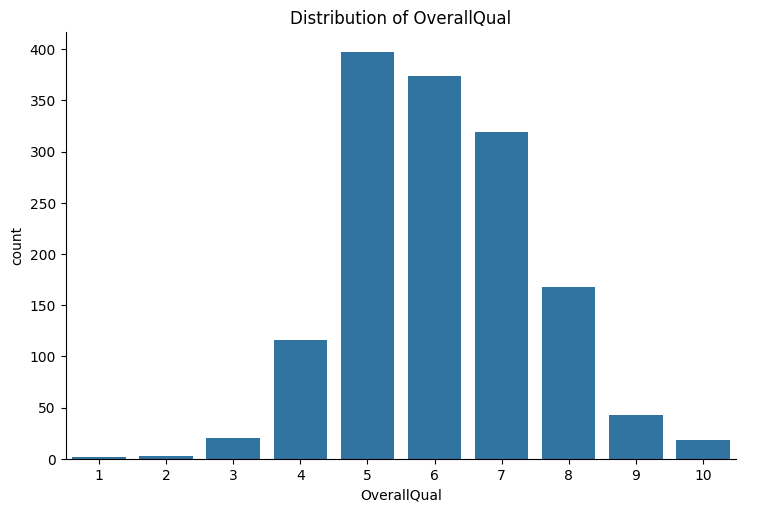

In [60]:
# OverallQual distribution
sb.catplot(x='OverallQual', data=houseCatData, kind='count', height=5, aspect=1.5)
plt.title('Distribution of OverallQual')

In [61]:
#Check the relationship between variables using heatmap

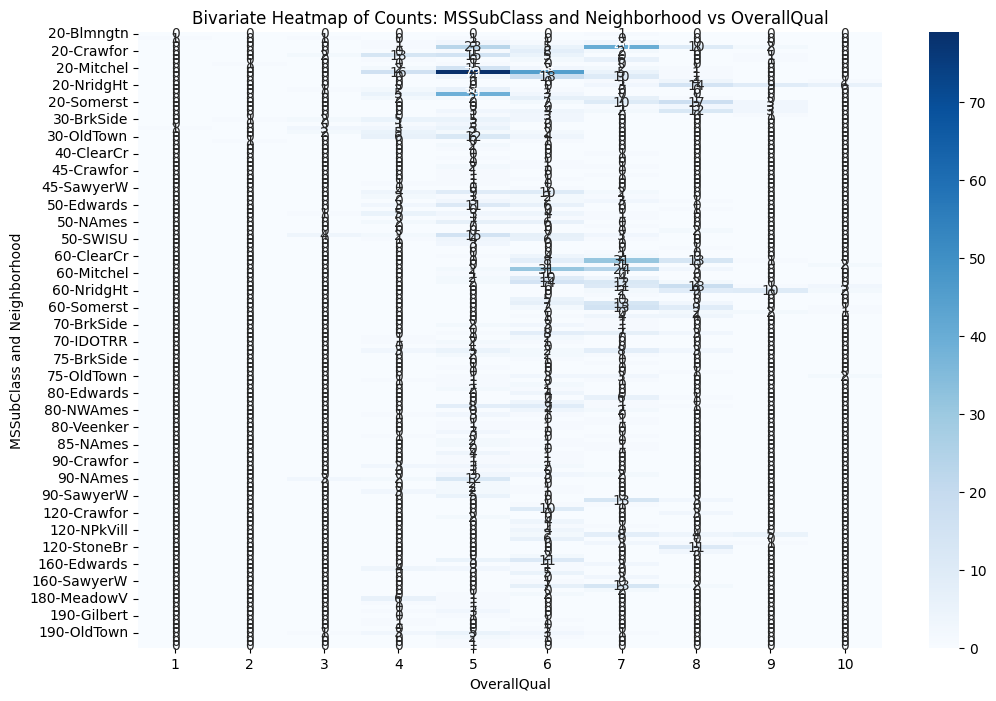

In [63]:
# Create a contingency table for the relationship between the variables
contingency_table = pd.crosstab([houseCatData['MSSubClass'], houseCatData['Neighborhood']], houseCatData['OverallQual'])

# Heatmap of the contingency table
plt.figure(figsize=(12, 8))
sb.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Bivariate Heatmap of Counts: MSSubClass and Neighborhood vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('MSSubClass and Neighborhood')
plt.show()


In [64]:
#boxplot of salesprice against these categorical data


<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

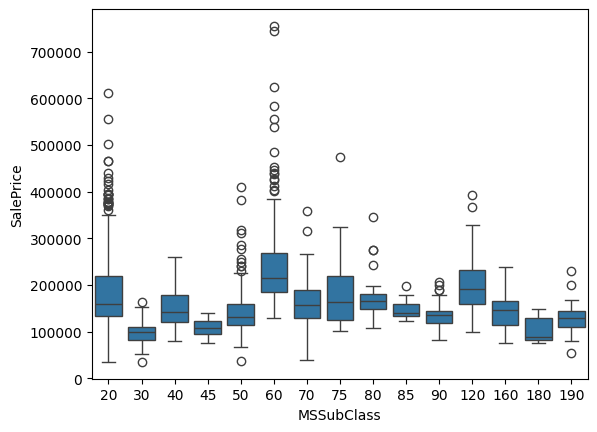

In [68]:
sb.boxplot(x='MSSubClass', y = 'SalePrice', data = hsedata)

<Axes: xlabel='BldgType', ylabel='SalePrice'>

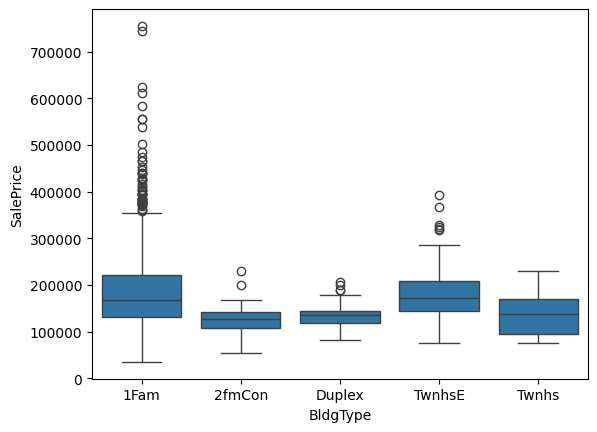

In [69]:
sb.boxplot(x='BldgType', y='SalePrice', data=hsedata)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

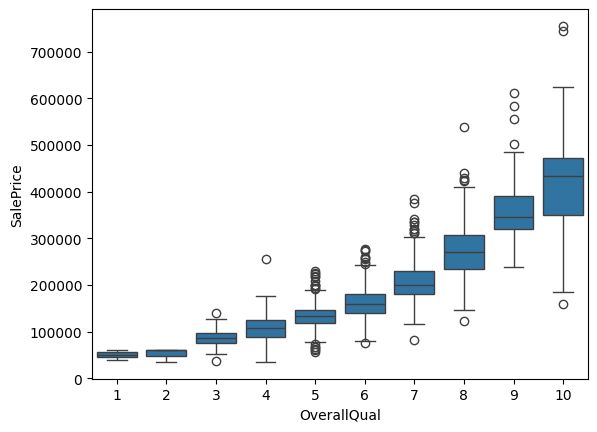

In [71]:
sb.boxplot(x='OverallQual', y='SalePrice', data=hsedata)

In [ ]:
## In conclussion, OverallQual has the highest relationship with salesprice